# Sport Image Classification Project
- **Nama:** Muhammad Aldy Naufal Fadhilah
- **Email:** aldy.naufal02@gmail.com
- **ID Dicoding:** aldy_naufal

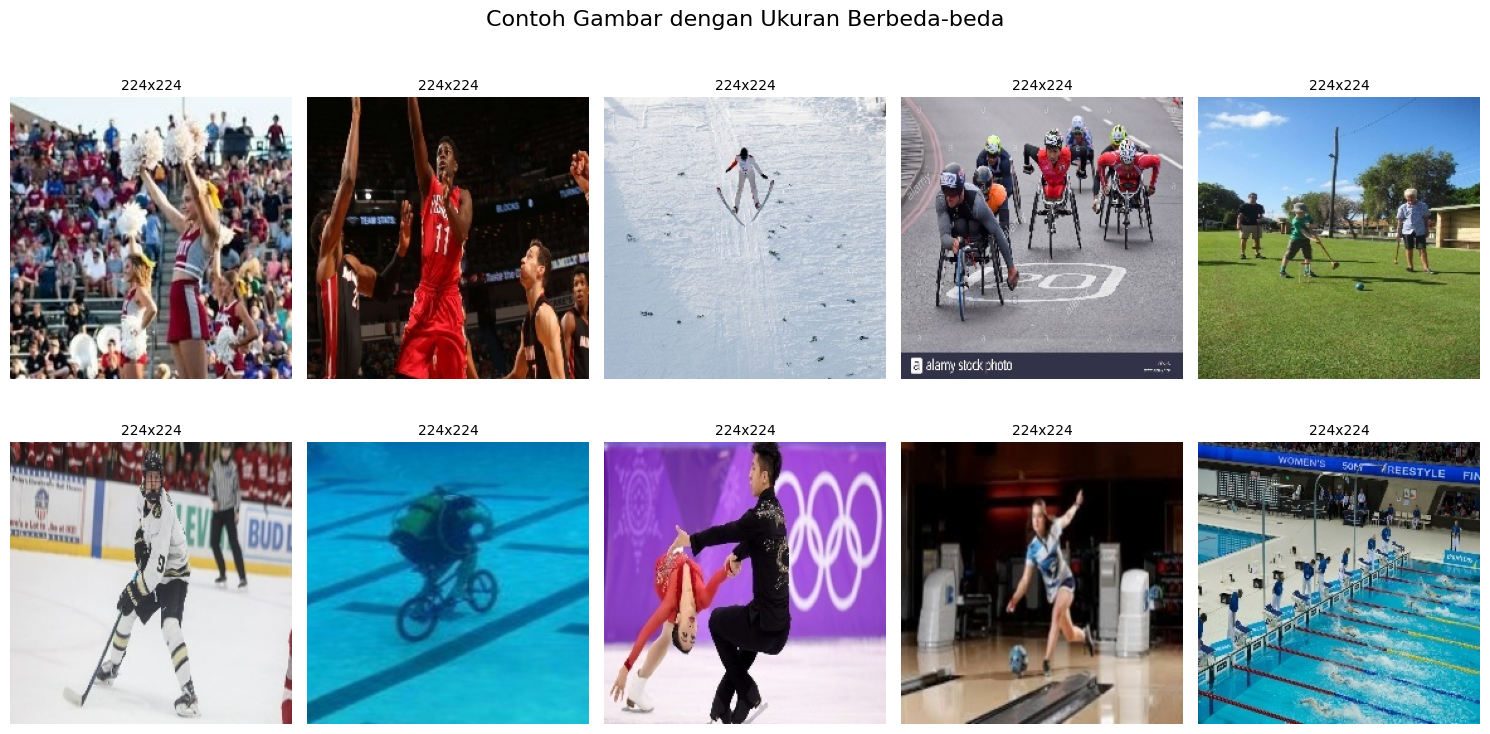

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preprocessing: Normalisasi saja, tanpa resize
train_datagen = ImageDataGenerator(rescale=1./255)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Path data
train_dir = 'data/train'
val_dir = 'data/valid'
test_dir = 'data/test'

# Load dataset (tanpa resize untuk buktikan ukuran tidak seragam)
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # ganti sesuai kebutuhan
    class_mode='categorical',
    batch_size=32,
    shuffle=True
)

val_data = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

test_data = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 13492 images belonging to 100 classes.
Found 500 images belonging to 100 classes.
Found 500 images belonging to 100 classes.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

c:\Users\FX506\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, validation_data=val_data, epochs=30, callbacks=[early_stop, reduce_lr])

c:\Users\FX506\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 465s 1s/step - accuracy: 0.0147 - loss: 5.2902 - val_accuracy: 0.0100 - val_loss: 4.6053 - learning_rate: 0.0010
Epoch 2/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 267s 633ms/step - accuracy: 0.0147 - loss: 4.6115 - val_accuracy: 0.0100 - val_loss: 4.6060 - learning_rate: 0.0010
Epoch 3/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 257s 610ms/step - accuracy: 0.0128 - loss: 4.5972 - val_accuracy: 0.0100 - val_loss: 4.6086 - learning_rate: 0.0010
Epoch 4/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 228s 539ms/step - accuracy: 0.0138 - loss: 4.5953 - val_accuracy: 0.0100 - val_loss: 4.6093 - learning_rate: 5.0000e-04
Epoch 5/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 228s 541ms/step - accuracy: 0.0125 - loss: 4.5934 - val_accuracy: 0.0100 - val_loss: 4.6101 - learning_rate: 5.0000e-04
Epoch 6/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 222s 526ms/step - accuracy: 0.0140 - loss: 4.5956 - val_accuracy: 0.0100 - val_loss: 4.6105 - learning_rate: 2.5000e-04
